In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset
data=pd.read_csv("C:/Users/HP/Desktop/Music/Final Data.csv")
df=pd.DataFrame(data)

In [3]:
df1=df.iloc[:,5:] # contains all numeric columns
df1.head()

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.091806,0.049545,1.0,0.306971,0.570429,0.556123,-1.389693,0.344998,0.035745,1.0,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,1.025965,0.007265,1.0,0.274179,0.350277,0.265414,0.140231,0.379772,0.004221,1.0,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,1.395750,0.000648,1.0,0.307888,0.236975,0.087020,0.739644,1.646942,0.000456,1.0,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,0.926616,0.003467,1.0,0.242382,0.301311,0.262466,0.285644,0.843115,0.003586,1.0,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,0.311976,0.037900,1.0,0.336300,0.517165,0.438171,-1.429111,0.892591,0.045833,1.0,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578


### Outlier Removal

In [4]:
feature = df1 # one or more.
for cols in feature:
    Q1 = df1[cols].quantile(0.25)
    Q3 = df1[cols].quantile(0.75)
    IQR = Q3 - Q1
    dff = df1[((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR)))]
f=dff.index
new_df = df.iloc[f]
new_df

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
4,BTS,Butter,1,Songs/BTS (방탄소년단) 'Butter' Official MV.mp3,Songs/RepeatedPopularChorus/BTS (방탄소년단) 'Butte...,0.311976,0.037900,1.000000,0.336300,0.517165,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578
6,Ariana Grande,Positions,1,Songs/Ariana Grande - positions (official vide...,Songs/RepeatedPopularChorus/Ariana Grande - po...,0.625499,0.004906,1.000000,0.349639,0.401012,...,-0.010469,-0.013594,0.965718,1.482353,0.046122,0.253288,0.031441,0.129609,0.122585,3.700731
10,Billie Eilish,Therefore I Am,1,Songs/Billie Eilish - Therefore I Am (Official...,Songs/RepeatedPopularChorus/Billie Eilish - Th...,1.162719,0.002263,1.000000,0.287140,0.314937,...,-0.005514,-0.008329,1.982250,2.836909,0.019819,0.239637,0.043763,0.057317,0.042630,7.582306
27,Billie Eilish,Everything I Wanted,1,Songs/Billie Eilish - everything i wanted.mp3,Songs/RepeatedPopularChorus/Billie Eilish - ev...,2.054160,0.000891,1.000000,0.214297,0.193929,...,-0.045801,-0.068198,1.039385,2.654018,0.017188,0.110884,0.020011,0.033907,0.029252,6.562822
34,Travis Scott,HIGHEST IN THE ROOM,1,Songs/Travis Scott - HIGHEST IN THE ROOM (Offi...,Songs/RepeatedPopularChorus/Travis Scott - HIG...,-0.262656,0.013173,1.000000,0.248823,0.613265,...,0.001246,0.006099,0.763980,2.129763,0.004444,0.163265,0.033201,0.043951,0.033469,4.543320
35,Billie Eilish,Bad Guy,1,Songs/Billie Eilish - bad guy.mp3,Songs/RepeatedPopularChorus/Billie Eilish - ba...,0.178027,0.000281,1.000000,0.347532,0.499044,...,-0.012577,-0.021004,0.666234,2.164522,0.006122,0.151338,0.027018,0.040549,0.029819,4.580265
49,Post Malone,Wow.,1,Songs/Post Malone - Wow. (Official Music Video...,Songs/RepeatedPopularChorus/Post Malone - Wow.wav,0.502662,0.052085,1.000000,0.252732,0.487696,...,0.051006,0.041427,-0.266746,2.279495,0.008617,0.068934,0.012543,0.020087,0.015669,4.797579
66,Billie Eilish,Bury A Friend,1,Songs/Billie Eilish - bury a friend.mp3,Songs/RepeatedPopularChorus/Billie Eilish - bu...,0.538453,0.000930,1.000000,0.341398,0.420140,...,-0.006607,-0.002414,5.256197,1.632094,0.004444,0.071429,0.010614,0.023396,0.022721,4.517935
96,Imagine Dragons,Believer,1,Songs/Imagine Dragons - Believer (Lyrics).mp3,Songs/RepeatedPopularChorus/Imagine Dragons - ...,0.218424,0.026624,1.000000,0.284611,0.540382,...,-0.002652,-0.015129,0.318284,-1.648012,0.035556,0.118005,0.014465,0.098228,0.100884,3.608261
99,Future,Mask Off,1,Songs/Future - Mask Off (Official Music Video)...,Songs/RepeatedPopularChorus/Future - Mask Off ...,-0.252258,0.079990,1.000000,0.214092,0.639971,...,-0.045112,-0.039801,-0.240430,1.838193,0.011020,0.042494,0.005778,0.021088,0.020023,3.721683


In [5]:
x = new_df.iloc[:,5:]# feature columns
y = new_df['Label'] # target column

In [6]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0)
print(" Training data: ",X_train.shape)
print(" Testing data:  ",X_test.shape)

 Training data:  (28, 518)
 Testing data:   (13, 518)


### Feature Selection

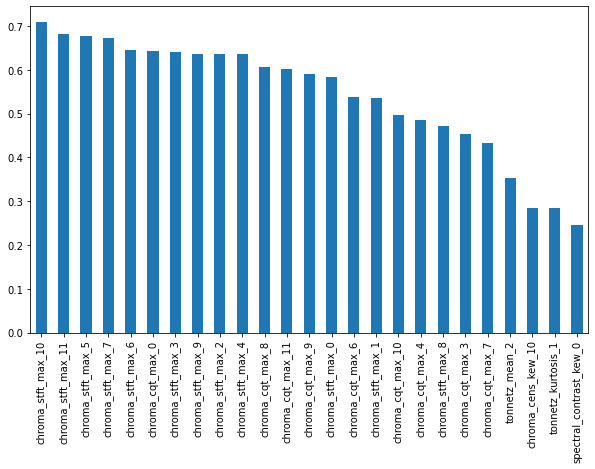

In [7]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
s=mutual_info.sort_values(ascending=False)[:25]
s.plot.bar(figsize=(10,6))
f=s.index

In [8]:
x1 = new_df[f]
y1 = new_df["Label"]

In [9]:
# separate dataset into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(
    x1,
    y1,
    test_size=0.3,
    random_state=0)
print(" Training data: ",X1_train.shape)
print(" Testing data:  ",X1_test.shape)

 Training data:  (28, 25)
 Testing data:   (13, 25)


In [10]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X1_train, y_train)

In [11]:
# separate dataset into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)
print(" Training data: ",X2_train.shape)
print(" Testing data:  ",X2_test.shape)

 Training data:  (30, 25)
 Testing data:   (14, 25)


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm1 = scaler.fit_transform(X2_train)
X_test_norm1 = scaler.transform(X2_test)

### Logistic Regression

In [13]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# logistic regression object
reg = LogisticRegression()
   
# train the model using the training sets
reg.fit(X_train_norm1, y2_train)
  
# making predictions on the testing set
y_pred = reg.predict(X_test_norm1)

score = metrics.accuracy_score(y2_test, y_pred)*100
print("Test accuracy:", round(score,2))

y_pred1 = reg.predict(X_train_norm1)
score = metrics.accuracy_score(y2_train, y_pred1)*100
print("Training accuracy:", round(score,2))

Test accuracy: 64.29
Training accuracy: 93.33


### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier() 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_norm1, y2_train)
 
# performing predictions on the test dataset
y_pred2 = clf.predict(X_test_norm1)
y_pred3 = clf.predict(X_train_norm1)
 
score = metrics.accuracy_score(y2_test, y_pred2)*100
print("Test accuracy:", round(score,2))

score = metrics.accuracy_score(y2_train, y_pred3)*100
print("Training accuracy:", round(score,2))

Test accuracy: 78.57
Training accuracy: 100.0


### Cross validating Random Forest

In [15]:
# evaluating the model using repeated k-fold cross-validation
from numpy import mean
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=3, n_repeats=7, random_state=1)

# evaluate model
scores = cross_val_score(clf, X_train_norm1, y2_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Training Accuracy:',round(mean(scores),2)*100)

Training Accuracy: 93.0


In [16]:
# pickling the model
import pickle
pickle_out = open("class.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

In [ ]:
# evaluating the model using repeated k-fold cross-validation
from numpy import mean
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=3, n_repeats=7, random_state=1)

# evaluate model
scores = cross_val_score(clf, X_test_norm1, y2_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Testing Accuracy:',round(mean(scores),2)*100)

### Classification Report

#### 1. Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,y_pred))

#### 2. Random Forest

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,y_pred2))

In [17]:
import pandas as pd
dataset = pd.read_csv('C:/Users/HP/Desktop/Music/ExtractedChoruses1.csv')
paths = list(dataset['Chorus_Path'])
titles = list(dataset['Title'])
data=[]

In [18]:
import librosa
import numpy as np
from scipy.stats import skew , kurtosis

def statistics(list, feature, columns_name, data):
    i = 0
    for ele in list:
        _skew = skew(ele)
        columns_name.append(f'{feature}_kew_{i}')
        min = np.min(ele)
        columns_name.append(f'{feature}_min_{i}')
        max = np.max(ele)
        columns_name.append(f'{feature}_max_{i}')
        std = np.std(ele)
        columns_name.append(f'{feature}_std_{i}')
        mean = np.mean(ele)
        columns_name.append(f'{feature}_mean_{i}')
        median = np.median(ele)
        columns_name.append(f'{feature}_median_{i}')
        _kurtosis = kurtosis(ele)
        columns_name.append(f'{feature}_kurtosis_{i}')

        i += 1
        data.append(_skew)
        data.append(min)
        data.append(max)
        data.append(std)
        data.append(mean)
        data.append(median)
        data.append(_kurtosis)
    return data

In [19]:
from librosa.feature.spectral import mfcc
def extract_features(audio_path, title):

  
    columns_name = ['title']
    data.append(title)
    x , sr = librosa.load(audio_path)

    chroma_stft = librosa.feature.chroma_stft(x, sr)
    stft = statistics(chroma_stft, 'chroma_stft', columns_name, data)
    #stft1.append(stft)

    chroma_cqt = librosa.feature.chroma_cqt(x, sr)
    cqt = statistics(chroma_cqt, 'chroma_cqt', columns_name, data)
    #cqt1.append(cqt)

    chroma_cens = librosa.feature.chroma_cens(x, sr)
    cens = statistics(chroma_cens, 'chroma_cens', columns_name, data)
    #cens1.append(cens)

    mfcc = librosa.feature.mfcc(x, sr)
    mf = statistics(mfcc, 'mfcc', columns_name, data)
    #mf1.append(mf)

    rms = librosa.feature.rms(x, sr)
    rm = statistics(rms, 'rms', columns_name, data)
    #rm1.append(rm)

    spectral_centroid = librosa.feature.spectral_centroid(x, sr)
    centroid = statistics(spectral_centroid, 'spectral_centroid', columns_name, data)
    #centroid1.append(centroid)

    spectral_bandwidth = librosa.feature.spectral_bandwidth(x, sr)
    bandwidth = statistics(spectral_bandwidth, 'spectral_bandwidth', columns_name, data)
    #bandwidth1.append(bandwidth)

    spectral_contrast = librosa.feature.spectral_contrast(x, sr)
    contrast = statistics(spectral_contrast, 'spectral_contrast', columns_name, data)
    #contrast1.append(contrast)

    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr)
    rolloff = statistics(spectral_rolloff, 'spectral_rolloff', columns_name, data)
    #rolloff1.append(rolloff)

    tonnetz = librosa.feature.tonnetz(x, sr)
    tonnetz = statistics(tonnetz, 'tonnetz', columns_name, data)
    #tonnetz1.append(tonnetz)

    zero_crossing_rate = librosa.feature.zero_crossing_rate(x, sr)
    zero = statistics(zero_crossing_rate, 'zero_crossing_rate', columns_name, data)
    #zero1.append(zero)

    return data , columns_name

In [23]:
data = []
columns_name = []

#file = st.sidebar.file_uploader("Upload Audio To Classify", type=["wav"])
#ca = file
# user input 
ca =["Doja Cat - Candy (Audio).wav"]

for i , chorus in enumerate(ca):
    data , columns_name = extract_features(f"C:/Users/HP/Desktop/Music/{chorus}", chorus)

In [24]:
df = pd.DataFrame(dataset) 
# combining list of row values (data) and list of columns (columns_name)

nnn = []
for i in range(0, len(data), len(columns_name)):
    nnn.append(data[i:i + 519])
    
# creating dataframe
df2 = pd.DataFrame(nnn, columns=columns_name)
df2 = df2.drop(["title"],axis=1)
x2 = df2[f]

In [28]:
d1 =np.array(x2)
data1 = scaler.transform(d1)
hit_prediction = clf.predict(data1)
hit_prediction

array([1], dtype=int64)